In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def train_test_split(df, sizes = [0.7, 0.1, 0.2], shuffle = True):
    assert len(sizes) == 3, 'You should specify three sizes for train, validation, and test'
    if shuffle:
        df = df.sample(frac = 1).reset_index(drop=True)
    train_end_index = int(sizes[0] * len(df))
    valid_end_index = train_end_index + int(sizes[1] * len(df))
    return df.iloc[:train_end_index].reset_index(drop=True), df.iloc[train_end_index:valid_end_index].reset_index(drop=True), df.iloc[valid_end_index:].reset_index(drop=True)

In [3]:
def MSE(expected, predict):
    assert len(expected) == len(predict), 'Not equal size'
    expected = np.array(expected)
    predict = np.array(predict)
    return sum((expected-predict)**2) / len(expected)

In [4]:
df = pd.read_csv('./Dummy Data HSS.csv')

In [5]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181


In [6]:
df['Influencer'].value_counts()

Mega     1156
Micro    1152
Nano     1137
Macro    1121
Name: Influencer, dtype: int64

In [7]:
df['Influencer'] = df['Influencer'].replace({'Mega': 1, 'Micro': 2, 'Nano': 3, 'Macro': 4})

In [8]:
df['Influencer'].value_counts()

1    1156
2    1152
3    1137
4    1121
Name: Influencer, dtype: int64

In [9]:
train, valid, test = train_test_split(df)

In [10]:
print(f'Dataframe size: {len(df)}')
print(f'Train size: {len(train)}')
print(f'Test size: {len(test)}')
print(f'Validation size: {len(valid)}')

Dataframe size: 4566
Train size: 3196
Test size: 914
Validation size: 456


In [11]:
X_train, y_train = train.drop('Sales', axis=1), train['Sales']
X_valid, y_valid = valid.drop('Sales', axis=1), valid['Sales']
X_test, y_test = test.drop('Sales', axis=1), test['Sales']

In [12]:
from sklearn.preprocessing import PolynomialFeatures

pf2 = PolynomialFeatures(2)
pf3 = PolynomialFeatures(3)
pf4 = PolynomialFeatures(4)
pf5 = PolynomialFeatures(5)
pf6 = PolynomialFeatures(6)
pf7 = PolynomialFeatures(7)

In [13]:
from sklearn.linear_model import LinearRegression

linear1 = LinearRegression()
linear2 = LinearRegression()
linear3 = LinearRegression()
linear4 = LinearRegression()
linear5 = LinearRegression()
linear6 = LinearRegression()
linear7 = LinearRegression()

In [14]:
linear1.fit(X_train, y_train)
pred_train1 = linear1.predict(X_train)
pred_valid1 = linear1.predict(X_valid)
MSE_train1 = MSE(y_train, pred_train1)
MSE_valid1 = MSE(y_valid, pred_valid1)

In [15]:
print(f'MSE for ploy deg 1 on train: {MSE_train1}')
print(f'MSE for ploy deg 1 on valid: {MSE_valid1}')

MSE for ploy deg 1 on train: 139.94865017155553
MSE for ploy deg 1 on valid: 40.951623237624965


In [16]:
pftrain2 = pf2.fit_transform(X_train)
pfvalid2 = pf2.fit_transform(X_valid)
linear2.fit(pftrain2, y_train)
pred_train2 = linear2.predict(pftrain2)
pred_valid2 = linear2.predict(pfvalid2)
MSE_train2 = MSE(y_train, pred_train2)
MSE_valid2 = MSE(y_valid, pred_valid2)

In [17]:
print(f'MSE for ploy deg 2 on train: {MSE_train2}')
print(f'MSE for ploy deg 2 on valid: {MSE_valid2}')

MSE for ploy deg 2 on train: 77.01794097789684
MSE for ploy deg 2 on valid: 64.93815549101467


In [18]:
pftrain3 = pf3.fit_transform(X_train)
pfvalid3 = pf3.fit_transform(X_valid)
linear3.fit(pftrain3, y_train)
pred_train3 = linear3.predict(pftrain3)
pred_valid3 = linear3.predict(pfvalid3)
MSE_train3 = MSE(y_train, pred_train3)
MSE_valid3 = MSE(y_valid, pred_valid3)

In [19]:
print(f'MSE for ploy deg 3 on train: {MSE_train3}')
print(f'MSE for ploy deg 3 on valid: {MSE_valid3}')

MSE for ploy deg 3 on train: 33.23734907902519
MSE for ploy deg 3 on valid: 40.352460605589535


In [20]:
pftrain4 = pf4.fit_transform(X_train)
pfvalid4 = pf4.fit_transform(X_valid)
linear4.fit(pftrain4, y_train)
pred_train4 = linear4.predict(pftrain4)
pred_valid4 = linear4.predict(pfvalid4)
MSE_train4 = MSE(y_train, pred_train4)
MSE_valid4 = MSE(y_valid, pred_valid4)

In [21]:
print(f'MSE for ploy deg 4 on train: {MSE_train4}')
print(f'MSE for ploy deg 4 on valid: {MSE_valid4}')

MSE for ploy deg 4 on train: 18.369370276444773
MSE for ploy deg 4 on valid: 33.97327415716395


In [22]:
pftrain5 = pf5.fit_transform(X_train)
pfvalid5 = pf5.fit_transform(X_valid)
linear5.fit(pftrain5, y_train)
pred_train5 = linear5.predict(pftrain5)
pred_valid5 = linear5.predict(pfvalid5)
MSE_train5 = MSE(y_train, pred_train5)
MSE_valid5 = MSE(y_valid, pred_valid5)

In [23]:
print(f'MSE for ploy deg 5 on train: {MSE_train5}')
print(f'MSE for ploy deg 5 on valid: {MSE_valid5}')

MSE for ploy deg 5 on train: 10.365109742468324
MSE for ploy deg 5 on valid: 23.90743178433475


In [24]:
pftrain6 = pf6.fit_transform(X_train)
pfvalid6 = pf6.fit_transform(X_valid)
linear6.fit(pftrain6, y_train)
pred_train6 = linear6.predict(pftrain6)
pred_valid6 = linear6.predict(pfvalid6)
MSE_train6 = MSE(y_train, pred_train6)
MSE_valid6 = MSE(y_valid, pred_valid6)

In [25]:
print(f'MSE for ploy deg 6 on train: {MSE_train6}')
print(f'MSE for ploy deg 6 on valid: {MSE_valid6}')

MSE for ploy deg 6 on train: 8.713741040560345
MSE for ploy deg 6 on valid: 18.100990864190283


In [26]:
pftrain7 = pf7.fit_transform(X_train)
pfvalid7 = pf7.fit_transform(X_valid)
linear7.fit(pftrain7, y_train)
pred_train7 = linear7.predict(pftrain7)
pred_valid7 = linear7.predict(pfvalid7)
MSE_train7 = MSE(y_train, pred_train7)
MSE_valid7 = MSE(y_valid, pred_valid7)

In [27]:
print(f'MSE for ploy deg 7 on train: {MSE_train7}')
print(f'MSE for ploy deg 7 on valid: {MSE_valid7}')

MSE for ploy deg 7 on train: 8.044530768897504
MSE for ploy deg 7 on valid: 24.41779825668069


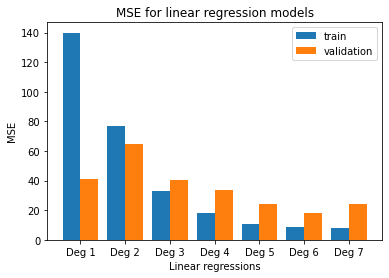

In [30]:
MSE_train = [MSE_train1,MSE_train2,MSE_train3,MSE_train4,MSE_train5,MSE_train6,MSE_train7]
MSE_valid = [MSE_valid1,MSE_valid2,MSE_valid3,MSE_valid4,MSE_valid5,MSE_valid6,MSE_valid7]
labels = [f'Deg {i}' for i in range(1,8)]
X = np.arange(len(labels))
plt.bar(X - 0.2, MSE_train, 0.4, label = 'train')
plt.bar(X + 0.2, MSE_valid, 0.4, label = 'validation')
plt.xticks(X, labels)
plt.xlabel("Linear regressions")
plt.ylabel("MSE")
plt.title("MSE for linear regression models")
plt.legend()
plt.show()

In [31]:
lineart1 = LinearRegression()
lineart2 = LinearRegression()
lineart3 = LinearRegression()
lineart4 = LinearRegression()
lineart5 = LinearRegression()
lineart6 = LinearRegression()
lineart7 = LinearRegression()

In [32]:
from mlxtend.evaluate import bias_variance_decomp
import mlxtend

mse1, bias1, var1 = mlxtend.evaluate.bias_variance_decomp(lineart1, X_train.values, y_train.values,X_test.values, y_test.values, loss='mse')
print(f'For linear regression deg 1 -> MSE: {mse1}, Bias: {bias1}, Var: {var1}')

For linear regression deg 1 -> MSE: 135.36011458596408, Bias: 133.79614597185937, Var: 1.5639686141047096


In [39]:
mse2, bias2, var2 = mlxtend.evaluate.bias_variance_decomp(lineart2, pf2.fit_transform(X_train), y_train.values, pf2.fit_transform(X_test), y_test.values, loss='mse')
print(f'For linear regression deg 2 -> MSE: {mse2}, Bias: {bias2}, Var: {var2}')

For linear regression deg 2 -> MSE: 79.88831617650048, Bias: 74.63198303264957, Var: 5.256333143850978


In [41]:
mse3, bias3, var3 = mlxtend.evaluate.bias_variance_decomp(lineart3, pf3.fit_transform(X_train), y_train.values,pf3.fit_transform(X_test), y_test.values, loss='mse')
print(f'For linear regression deg 3 -> MSE: {mse3}, Bias: {bias3}, Var: {var3}')

For linear regression deg 3 -> MSE: 37.75969082171536, Bias: 30.90078243747101, Var: 6.858908384244397


In [43]:
mse4, bias4, var4 = mlxtend.evaluate.bias_variance_decomp(lineart4, pf4.fit_transform(X_train), y_train.values, pf4.fit_transform(X_test), y_test.values, loss='mse')
print(f'For linear regression deg 4 -> MSE: {mse4}, Bias: {bias4}, Var: {var4}')

For linear regression deg 4 -> MSE: 52.90549796185325, Bias: 19.811704467669216, Var: 33.093793494184055


In [44]:
mse5, bias5, var5 = mlxtend.evaluate.bias_variance_decomp(lineart5, pf5.fit_transform(X_train), y_train.values,pf5.fit_transform(X_test), y_test.values, loss='mse')
print(f'For linear regression deg 5 -> MSE: {mse5}, Bias: {bias5}, Var: {var5}')

For linear regression deg 5 -> MSE: 93.87545488543984, Bias: 24.025643756821925, Var: 69.84981112861784


In [45]:
mse6, bias6, var6 = mlxtend.evaluate.bias_variance_decomp(lineart6, pf6.fit_transform(X_train), y_train.values, pf6.fit_transform(X_test), y_test.values, loss='mse')
print(f'For linear regression deg 6 -> MSE: {mse6}, Bias: {bias6}, Var: {var6}')

For linear regression deg 6 -> MSE: 397.579976899568, Bias: 56.59559645147436, Var: 340.98438044809365


In [46]:
mse7, bias7, var7 = mlxtend.evaluate.bias_variance_decomp(lineart7, pf7.fit_transform(X_train), y_train.values, pf7.fit_transform(X_test), y_test.values, loss='mse')
print(f'For linear regression deg 7 -> MSE: {mse7}, Bias: {bias7}, Var: {var7}')

For linear regression deg 7 -> MSE: 7817.126406785817, Bias: 1375.6472769777051, Var: 6441.479129808111


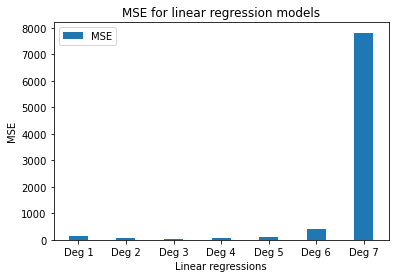

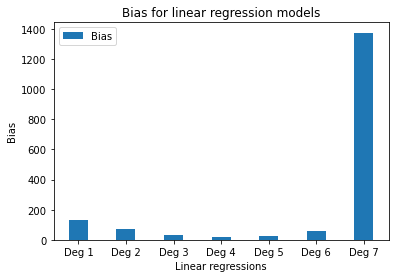

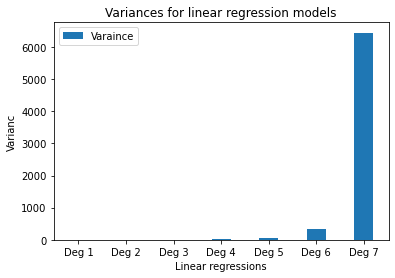

In [53]:
MSEs = [mse1, mse2, mse3, mse4, mse5, mse6, mse7]
Biases = [bias1, bias2, bias3, bias4, bias5, bias6, bias7]
Variances = [var1, var2, var3, var4, var5, var6, var7]
labels = [f'Deg {i}' for i in range(1,8)]
X = np.arange(len(labels))

plt.bar(X, MSEs, 0.4, label = 'MSE')
plt.xticks(X, labels)
plt.xlabel("Linear regressions")
plt.ylabel("MSE")
plt.title("MSE for linear regression models")
plt.legend()
plt.show()

plt.bar(X, Biases, 0.4, label = 'Bias')
plt.xticks(X, labels)
plt.xlabel("Linear regressions")
plt.ylabel("Bias")
plt.title("Bias for linear regression models")
plt.legend()
plt.show()

plt.bar(X, Variances, 0.4, label = 'Varaince')
plt.xticks(X, labels)
plt.xlabel("Linear regressions")
plt.ylabel("Varianc")
plt.title("Variances for linear regression models")
plt.legend()
plt.show()

In [55]:
from tabulate import tabulate

print(tabulate([['Deg', 'Bias', 'Variances', 'MSE']]+[[i+1, Biases[i], Variances[i],MSEs[i]] for i in range(7)]))

---  ------------------  ------------------  ------------------
Deg  Bias                Variances           MSE
1    133.79614597185937  1.5639686141047096  135.36011458596408
2    74.63198303264957   5.256333143850978   79.88831617650048
3    30.90078243747101   6.858908384244397   37.75969082171536
4    19.811704467669216  33.093793494184055  52.90549796185325
5    24.025643756821925  69.84981112861784   93.87545488543984
6    56.59559645147436   340.98438044809365  397.579976899568
7    1375.6472769777051  6441.479129808111   7817.126406785817
---  ------------------  ------------------  ------------------


In [71]:
def plotData(model, deg, pf = None):
    global X_train, y_train, test
    
    test_copy = test.sample(frac = 1).reset_index(drop=True)
    test_copy = test_copy.iloc[0:100]
    test_copy.sort_values(by=['Radio'], inplace= True)
    test_copy.reset_index(drop=True, inplace= True)

    X_test , y_test = test_copy.drop('Sales', axis=1) , test_copy['Sales']

    if pf == None:
        X = X_test
    else:
        X = pf.fit_transform(X_test)
        
    predict = model.predict(X)

    fig = plt.subplots(figsize =(12, 8))
    
    plt.plot(X_train['Radio'], y_train, "b.")
    plt.plot(X_test['Radio'], predict, "r-", linewidth=2, label="Predictions")
    plt.xlabel("Radio", fontsize=18)
    plt.ylabel("Sales", fontsize=18)
    plt.title(f"Sales per radio in deg {deg}")
    plt.grid()
    plt.show()

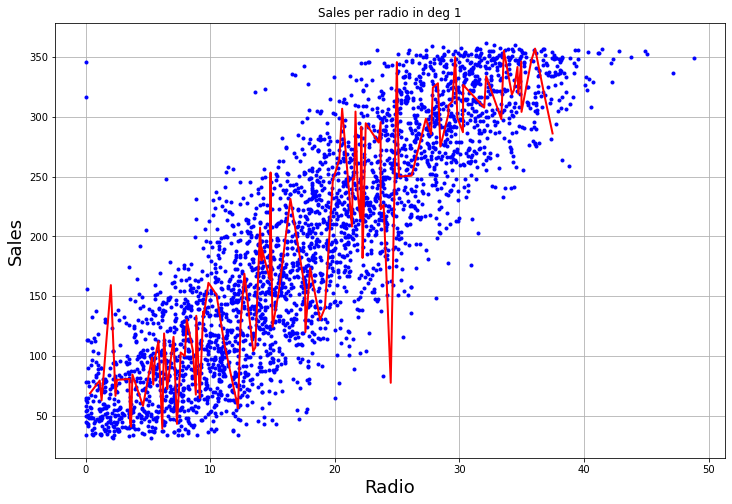

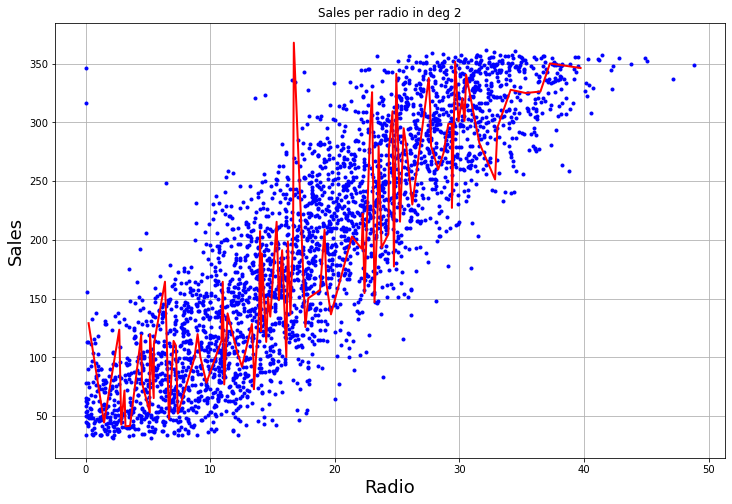

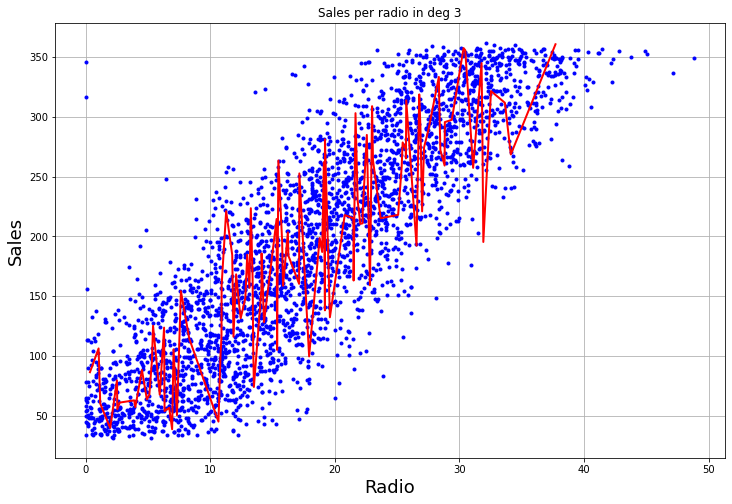

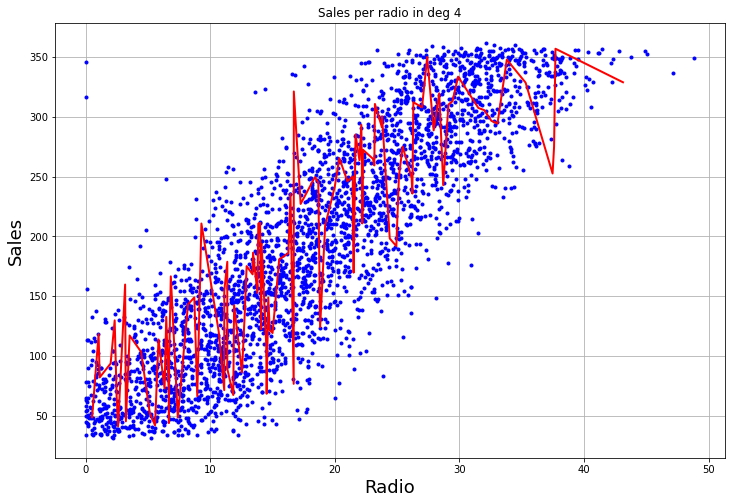

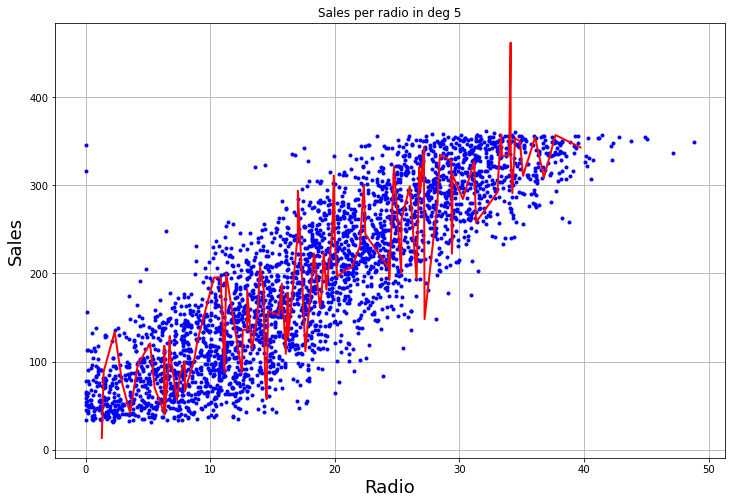

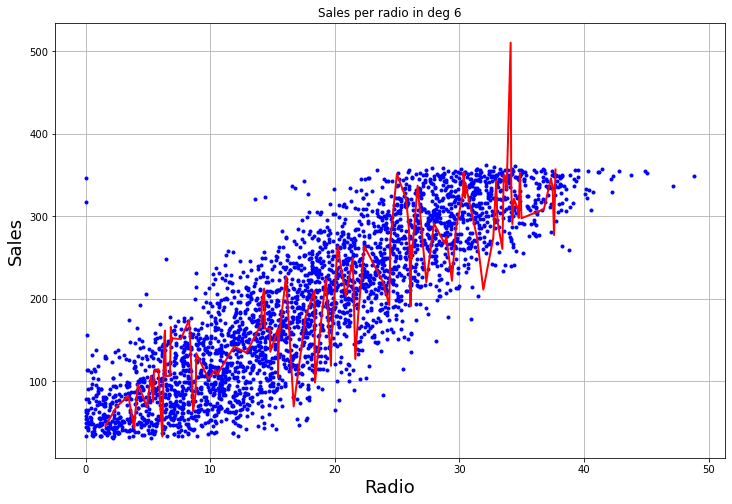

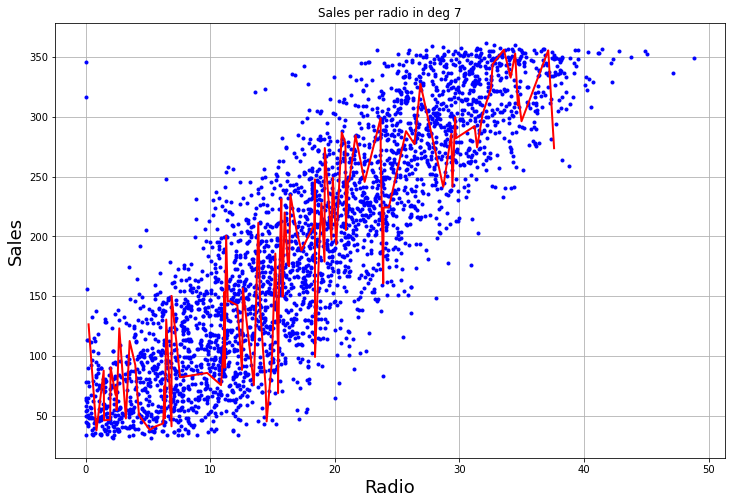

In [74]:
pfs = [None, pf2, pf3, pf4, pf5, pf6, pf7]
linearts = [lineart1, lineart2, lineart3, lineart4, lineart5, lineart6, lineart7]
for i in range(7):
    plotData(linearts[i], i+1, pfs[i])